### 1. Mengimpor Library yang Diperlukan

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Mengimpor Data

In [2]:
# Mengimpor dataset dari file CSV
data = pd.read_csv(r'C:\Users\User\Downloads\Data Mining\Asosiasi_Apriori\Groceries_dataset.csv')

In [3]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### 3. Menyiapkan Data

In [4]:
# Mengubah data transaksi menjadi format yang sesuai
basket = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')

# Mengonversi nilai menjadi format biner (1 jika dibeli, 0 jika tidak)
basket = basket.where(basket > 0, 0).where(basket <= 0, 1)

In [5]:
# Menampilkan hasil transformasi
print(basket.head())

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1000                               0.0       0.0               0.0   
1001                               0.0       0.0               0.0   
1002                               0.0       0.0               0.0   
1003                               0.0       0.0               0.0   
1004                               0.0       0.0               0.0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Member_number                                                            
1000                          0.0             0.0   0.0            0.0   
1001                          0.0             0.0   0.0            0.0   
1002                          0.0             0.0   0.0            0.0   
1003                          0.0             0.0   0.0            0.0   
1004                          0.0             0.0   0.0          

### 4. Menerapkan Algoritma Apriori

In [18]:
# Menerapkan algoritma Apriori untuk menemukan item-item yang sering muncul
frequent_items = apriori(basket, min_support=0.05, use_colnames=True)

# Menampilkan hasil frequent itemsets
print(frequent_items)

      support                                        itemsets
0    0.078502                                      (UHT-milk)
1    0.119548                                          (beef)
2    0.079785                                       (berries)
3    0.062083                                     (beverages)
4    0.158799                                  (bottled beer)
..        ...                                             ...
160  0.050539  (tropical fruit, whole milk, other vegetables)
161  0.071832          (yogurt, whole milk, other vegetables)
162  0.065162                  (soda, rolls/buns, whole milk)
163  0.065931                (rolls/buns, yogurt, whole milk)
164  0.054387                      (whole milk, yogurt, soda)

[165 rows x 2 columns]

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### 5: Generate Association Rules

In [12]:
# Menghasilkan aturan asosiasi dari frequent itemsets
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

# Menampilkan beberapa aturan asosiasi yang dihasilkan
print(rules.head())

          antecedents         consequents  antecedent support  \
0              (beef)  (other vegetables)            0.119548   
1  (other vegetables)              (beef)            0.376603   
2        (whole milk)              (beef)            0.458184   
3              (beef)        (whole milk)            0.119548   
4      (bottled beer)  (other vegetables)            0.158799   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.376603  0.050795    0.424893  1.128223  0.005773    1.083966   
1            0.119548  0.050795    0.134877  1.128223  0.005773    1.017719   
2            0.119548  0.064135    0.139978  1.170886  0.009360    1.023754   
3            0.458184  0.064135    0.536481  1.170886  0.009360    1.168919   
4            0.376603  0.068497    0.431341  1.145345  0.008692    1.096257   

   zhangs_metric  
0       0.129082  
1       0.182309  
2       0.269364  
3       0.165762  
4       0.150857  


### 6: Visualize the Results

Scatter Plot

Menunjukkan distribusi support dan confidence dari semua aturan asosiasi. Titik yang lebih besar mewakili lift yang lebih tinggi, menunjukkan kekuatan asosiasi yang lebih kuat antara item.

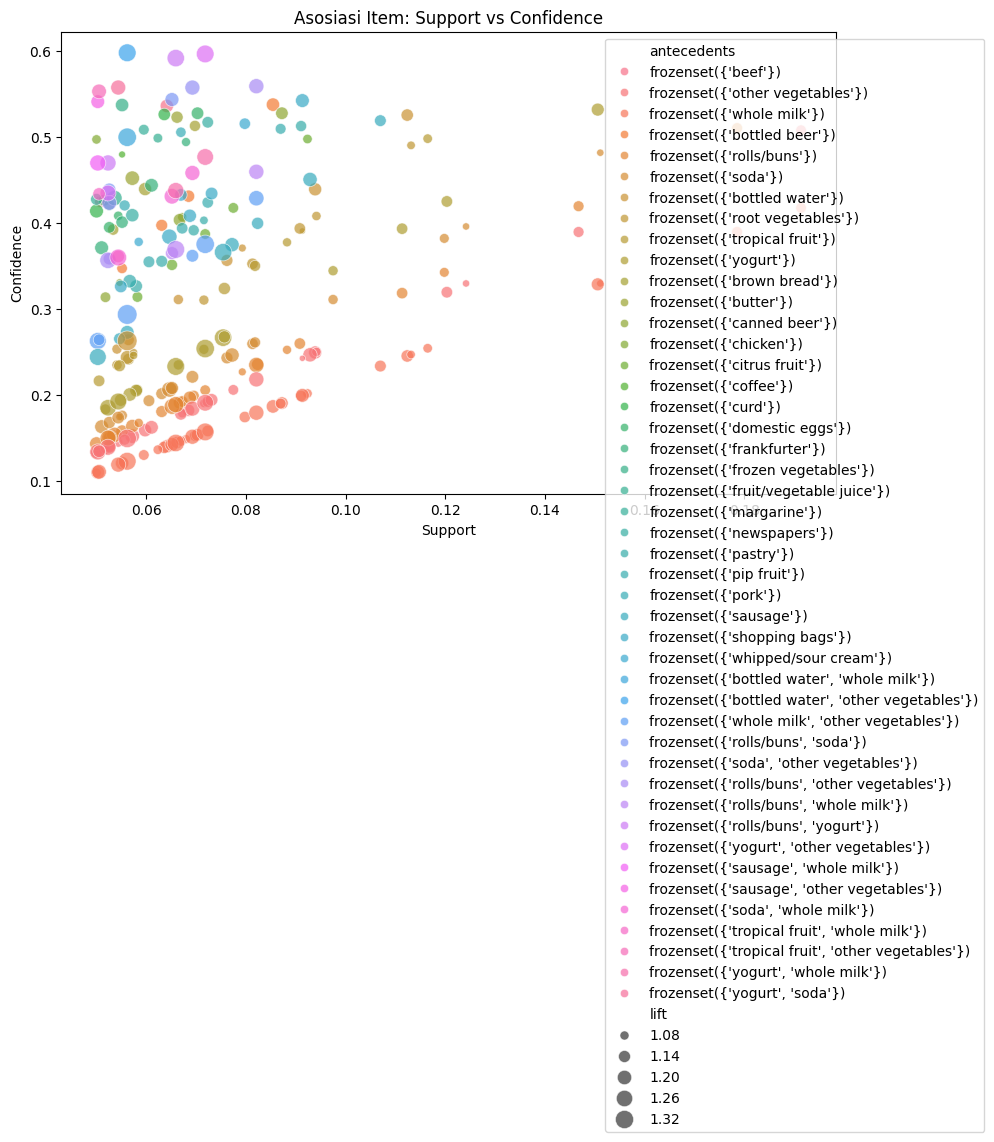

In [20]:
# Visualisasi asosiasi menggunakan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='antecedents', alpha=0.7)
plt.title('Asosiasi Item: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Network Graph

Menggambarkan hubungan antara item sebagai graf. Setiap node mewakili item, dan edge menunjukkan hubungan antara item berdasarkan aturan asosiasi.

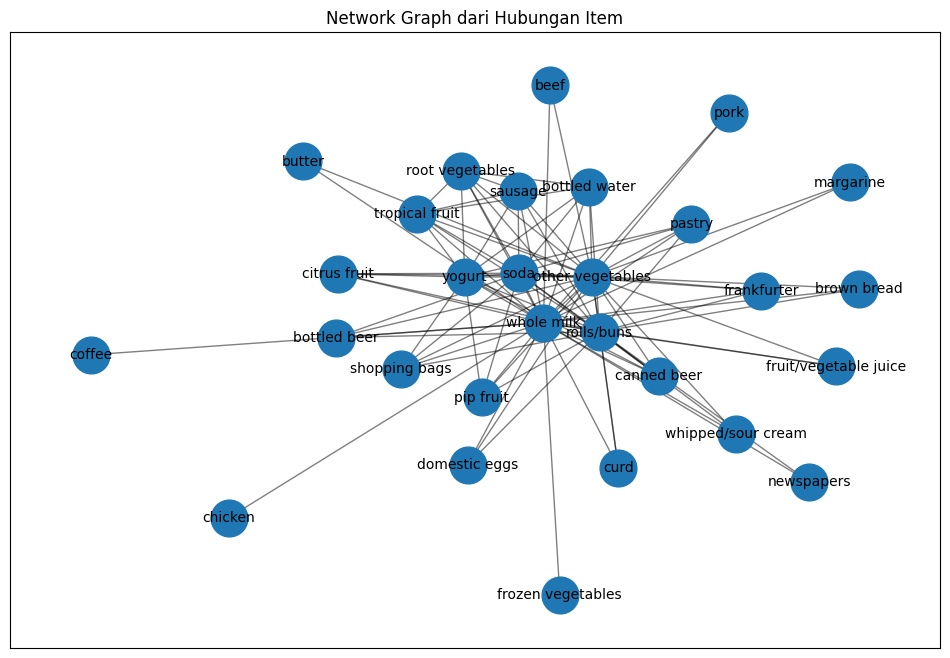

In [23]:
import networkx as nx

# Membuat graf kosong
G = nx.Graph()

# Menambahkan edge berdasarkan aturan asosiasi
for _, rule in rules.iterrows():
    G.add_edge(list(rule['antecedents'])[0], list(rule['consequents'])[0], weight=rule['lift'])

# Menggambar graf
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # Penempatan node
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Network Graph dari Hubungan Item')
plt.show()